<div style="display: flex;">
    <h1>Machine Learning on Titanic dataset</h1>
    <img src="img/titanic.jpeg" height="100px" width="250px"/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><strong>Defining a quantitative objective</strong></li>
        <li><strong>EDA (Exploratory Data Analysis):</strong> Understanding as much as possible the data in order to define modelling startegy.
        <ul>
            <li><span style="color: blue;">Identifying the target</span></li>
            <li><span style="color: blue;">Number of rows and columns</span></li>
            <li><span style="color: blue;">Variables types</span></li>
            <li><span style="color: blue;">Identification of missing values</span></li>
            <li><span style="color: red;">Visualizing the target</span></li>
            <li><span style="color: red;">Understanding all the variables</span></li>
            <li><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><span style="color: red;">Identifying outliers</span></li>
        </ul></li>
        <li><strong>Pre-Processing: </strong>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><strong>Modelling: </strong> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
    <p>
        <a href='https://scikit-learn.org/stable/index.html#' target='_blank'>See Scikit-Learn documentation</a>
        <br/>
        <a href='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html' target='_blank'>See Scikit-Learn scheme for choosing the right model</a>
        <br/>
        <a href='https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/', target='_blank'>See external ressouces about classification metrics</a>
    </p>
</div>

<h3>1) Objective</h3>

<strong>We want to predict the 'survived' variable (binary) with a F-score (oe Accuracy) of 80%</strong> from features. </br>In order to choose a relevant metrics for evaluation (and thus be more precise in our objective), we first have to explore the data.

<h3>2) EDA</h3>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
titanic = sns.load_dataset("titanic")
titanic.drop(axis=1, inplace=True, columns=['embarked', 'class', 'who', 'adult_male', 
                                            'deck', 'embark_town', 'alive'])
print("{} rows X {} columns".format(titanic.shape[0], titanic.shape[1]))
titanic.head()

891 rows X 8 columns


,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,male,22.0,1,0,7.2500,False
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,True
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [27]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<strong>By comparing the count value for the 'age' feature and other features we can see that there are missing values in the 'age' feature (177 observations).
We also see that the 'fare' feature has a strong variability.</strong>

In [28]:
#we can confirm with the following command :
print("There is {} missing values".format(len(titanic['age']) - titanic['age'].count()))
#or the commands below
#len(titanic['age'][titanic['age'].isnull()])

There is 177 missing values


Visualizing the target :

0    549
1    342
Name: survived, dtype: int64


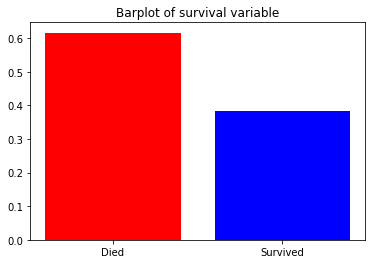

In [29]:
plt.figure()
plt.bar(x=['Died', 'Survived'],
        height=[list(titanic['survived']).count(0)/len(titanic['survived']),
                list(titanic['survived']).count(1)/len(titanic['survived'])],
        color=['red', 'blue'])
plt.title("Barplot of survival variable")
print(titanic['survived'].value_counts())

<strong>We seen a class-disequilibrium (in favor of class 'died'). We should carefully choose the evaluation metric (some are biaised by class-disequilibrium). Thus choose another metrics than 'Accuracy'.</strong>

Visualizing the relationships between continuous variables :

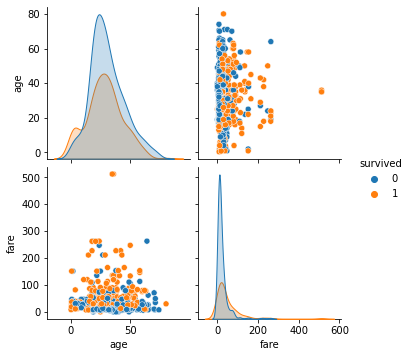

In [30]:
sns.pairplot(titanic, vars=['age', 'fare'], hue='survived', kind='scatter')

<strong>Age and Fare features are unimodal.</br>
Age seems to have a gaussian distribution while Fare seems to have an extreme distribution.</br>
The plotting of the two variables together isn't really relevant for separation between Survived target modalities.</strong>

Text(0.5, 1.0, "'Age' feature distribution")

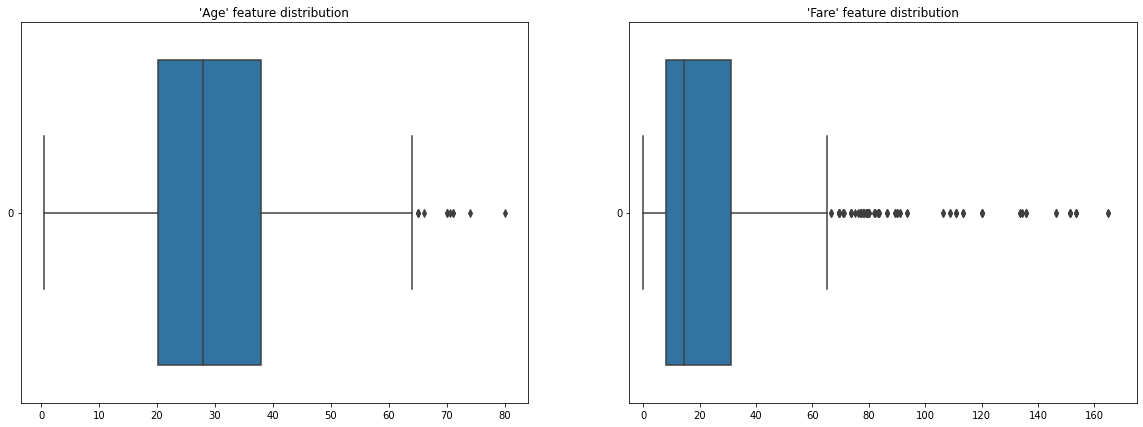

In [31]:
figure = plt.figure(figsize=(20,7))
age = figure.add_subplot(1,2,1)
fare = figure.add_subplot(1,2,2)
sns.boxplot(data=titanic['age'], orient='h', ax=age)
sns.boxplot(data=titanic['fare'], orient='h', ax=fare)
fare.set_xlim(-5, 175)
fare.set_title("'Fare' feature distribution")
age.set_title("'Age' feature distribution")

<strong>'Age' has less outliers than 'Fare' feature (an outlier is designed as a data out of 1.5 the IQR). We remenbers that 'Fare' features has the highest variability among the features.<strong>

Visualizing the relationships between categorical variables :

/home/anthony/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

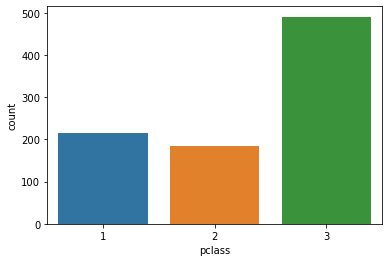

In [32]:
sns.countplot(titanic['pclass'])

<strong>We seen a class-disequilibrium (in favor of class 3).</strong>

<h3>3) Pre-Processing</h3>

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Splitting dataset into train set and test set :

In [34]:
Y = titanic['survived'].values
X = titanic.drop(axis=1, columns=['survived']).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, 
                                                    random_state=7, shuffle=True)
Y_train = np.reshape(Y_train, newshape=(Y_train.shape[0], 1))
Y_test = np.reshape(Y_test, newshape=(Y_test.shape[0], 1))
print("X train/test shapes: {}/{}".format(X_train.shape, X_test.shape))
print("Y train/test shapes: {}/{}".format(Y_test.shape, Y_test.shape))

X train/test shapes: (712, 7)/(179, 7)
Y train/test shapes: (179, 1)/(179, 1)


Removing/Replacing missing data :

In [35]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#we use an univariate imputer
#we used 'most_frequent' strategy because it works with categorical variable too
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)
#we should use multivariate imputer like KNNImputer

Encoding variables :

In [36]:
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

Feature selection :

In [37]:
X_train = pd.DataFrame(X_train, columns=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone'])
X_test = pd.DataFrame(X_test, columns=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone'])
X_train.head()

,pclass,sex,age,sibsp,parch,fare,alone
0,2.0,0.0,5.0,0.0,1.0,60.0,0.0
1,2.0,1.0,29.0,0.0,0.0,87.0,1.0
2,0.0,0.0,48.0,1.0,1.0,196.0,0.0
3,2.0,1.0,80.0,0.0,0.0,24.0,1.0
4,2.0,1.0,29.0,0.0,0.0,11.0,1.0


We decide to drop non relevant columns.

In [38]:
X_train = X_train.drop(axis=1, columns=['sibsp', 'parch']).values
X_test = X_test.drop(axis=1, columns=['sibsp', 'parch']).values

Feature scaling :

MinMaxScaler and StandardScaler are not suitable for data with many outliers... We have seen, from previous boxplot that we have outliers,  especially for the 'fare' feature.

In [39]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<h3>4) Modelling</h3>

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score

<h5>About K-Nearest Neighbors classification algorithm :</h5>
<p>"Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point."</p>

In [41]:
#we choose a Stratified Kfold because we seems to have a class-disequilibrium in our target variable
cv = StratifiedKFold(n_splits=5, shuffle=True)

For none or one hyperparamater tuning :

In [42]:
#training the model
#'model.fit(X_train, Y_train)' is the simpliest case
#cross_val_score(estimator=model, X=X_train, y=Y_train.reshape(Y_train.shape[0]), scoring='f1', cv=5) is a simple cross-validation, without hyperparameter tuning
train_score, val_score = validation_curve(estimator=KNeighborsClassifier(),
                                          X=X_train,
                                          y=Y_train.reshape(Y_train.shape[0]),
                                          param_name='n_neighbors',
                                          param_range=np.arange(1, 15),
                                          cv=cv)

We obtain a nxm array where n is the hyperparameter range and m is the number of cross-validation fold. Thus each line represents an hyperparameter value and each column represents a score obtained by cross-validation for a particular split.

Text(0, 0.5, 'scores')

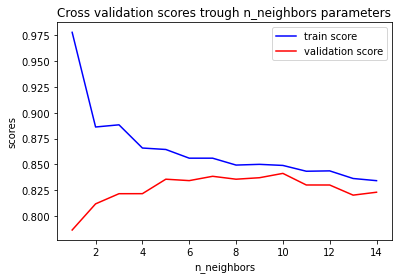

In [43]:
#displaying cross_validation scores for each hyperparamater value
figure = plt.figure()
main_ax = figure.add_subplot(1, 1, 1)
main_ax.plot(np.arange(1 ,15), train_score.mean(axis=1), c='b',label='train score')
main_ax.plot(np.arange(1 ,15), val_score.mean(axis=1), c='r', label='validation score')
main_ax.legend()
main_ax.set_title('Cross validation scores trough n_neighbors parameters')
main_ax.set_xlabel('n_neighbors')
main_ax.set_ylabel('scores')

For multiple hyperparameters tuning :

In [44]:
param_grid = {
    "n_neighbors":np.arange(1, 15),
    "metric":['euclidean','manhattan'],
    "weights":['uniform', 'distance']
}
grid = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=param_grid,
                   scoring='f1',
                   cv=cv)
grid.fit(X_train, Y_train.reshape(Y_train.shape[0]))
print(grid.best_score_) #validation score
print(grid.best_params_)
best_model = grid.best_estimator_

0.7648691027109514
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [45]:
#saving model
import pickle
pickle.dump(obj=best_model, file=open('../models/titanic.sav', 'wb'))

In [46]:
#testing the model
print("F-score for test dataset: {:.2f}%".format(f1_score(y_true=Y_test, y_pred=best_model.predict(X_test))*100))
print("Accuracy for test dataset: {:.2f}%".format(best_model.score(X_test, Y_test)*100))

F-score for test dataset: 69.29%
Accuracy for test dataset: 78.21%


Learning curve :

In [50]:
import pickle
best_model = pickle.load(open('../models/titanic.sav', 'rb'))

N, train_score, val_score = learning_curve(estimator=best_model,
                                           X=X_train,
                                           y=Y_train.reshape(Y_train.shape[0]),
                                           cv=cv,
                                           train_sizes=np.linspace(0.1, 1.0, 10),
                                           scoring='accuracy')

Text(0.5, 0, 'Size of the batch')

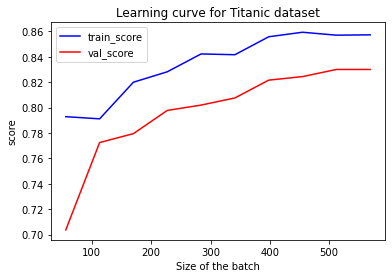

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(N, train_score.mean(axis=1), c='b', label='train_score')
ax.plot(N, val_score.mean(axis=1), c='r', label='val_score')
ax.legend()
ax.set_title('Learning curve for Titanic dataset')
ax.set_ylabel('score')
ax.set_xlabel('Size of the batch')

<p><strong>We observe a plateaus starting at n=400 (for accuracy metrics), so it is not valuable to have more data.</strong></p>